In [1]:
from sklearn.linear_model import LinearRegression
l_model=LinearRegression()
import pandas as pd
churn=pd.read_csv('customer_churn.csv') 

In [2]:
churn.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [3]:
churn.dtypes

Names               object
Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
Names              900 non-null object
Age                900 non-null float64
Total_Purchase     900 non-null float64
Account_Manager    900 non-null int64
Years              900 non-null float64
Num_Sites          900 non-null float64
Onboard_date       900 non-null object
Location           900 non-null object
Company            900 non-null object
Churn              900 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [5]:
X=churn.iloc[:,1:6]

In [6]:
X.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,42.0,11066.80,0,7.22,8.0
1,41.0,11916.22,0,6.50,11.0
2,38.0,12884.75,0,6.67,12.0
3,42.0,8010.76,0,6.71,10.0
4,37.0,9191.58,0,5.56,9.0


In [7]:
y=churn.iloc[:,9]

In [8]:
y.ndim

1

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [11]:
l_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
l_model.score(X_train,y_train)

0.3314757683547198

In [13]:
l_model.score(X_test,y_test)

0.2882147912103534

In [14]:
from sklearn.metrics import confusion_matrix
y_pred=l_model.predict(X_test)
confusion_matrix(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Kneigbour

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k_model=KNeighborsClassifier()
k_model.fit(X_train,y_train)
k_model.score(X_train,y_train)

0.845925925925926

In [16]:
k_model.score(X_test,y_test)

0.7866666666666666

In [17]:
from sklearn.metrics import confusion_matrix
y_pred=k_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[175,   9],
       [ 39,   2]], dtype=int64)

# Logistic

In [18]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
log_model.score(X_train,y_train)

C:\Users\Python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8488888888888889

In [19]:
log_model.score(X_test,y_test)

0.84

# Support vector machine

In [20]:
from sklearn.svm import SVC
s_model=SVC()
s_model.fit(X_train,y_train)
s_model.score(X_train,y_train)

C:\Users\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9985185185185185

In [21]:
s_model.score(X_test,y_test)

0.8177777777777778

In [22]:
from sklearn.metrics import confusion_matrix
y_pred=s_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[184,   0],
       [ 41,   0]], dtype=int64)

# decision tree regression model

In [23]:
from sklearn.tree import DecisionTreeClassifier
d_model=DecisionTreeClassifier()
d_model.fit(X_train,y_train)
d_model.score(X_train,y_train)

1.0

In [24]:
d_model.score(X_test,y_test)

0.8088888888888889

In [25]:
from sklearn.metrics import confusion_matrix
y_pred=d_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[166,  18],
       [ 25,  16]], dtype=int64)

In [26]:
from sklearn.tree import DecisionTreeRegressor
dr_model=DecisionTreeRegressor()
dr_model.fit(X_train,y_train)
dr_model.score(X_train,y_train)

1.0

In [27]:
dr_model.score(X_test,y_test)

-0.1631760339342525

In [28]:
from sklearn.metrics import confusion_matrix
y_pred=dr_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[171,  13],
       [ 26,  15]], dtype=int64)

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()

In [35]:
model2.fit(X_train,y_train)

C:\Users\Python\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.9881481481481481
0.8577777777777778


In [37]:
from sklearn.metrics import confusion_matrix
y_pred=model2.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[177,   7],
       [ 25,  16]], dtype=int64)

# DecisionTreeClassifier

In [38]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt=dt.fit(X,y)

[Ellipsis]

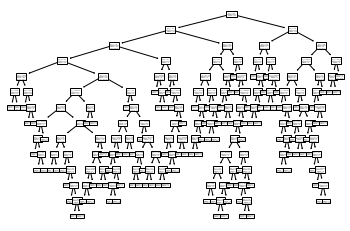

In [40]:
tree.plot_tree(dt)
[...]

In [41]:
from sklearn import tree
dtt=tree.DecisionTreeClassifier()
dtt=dtt.fit(X_test,y_test)

[Ellipsis]

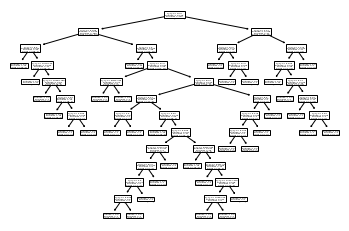

In [42]:
tree.plot_tree(dtt)
[...]